# Question 1: Calculating Quantum Mechanical Observables
For a spinless particle in a simple harmonic oscillator (SHO) potential, the wavefunction for energy level $n$, $\psi_n (x)$, is given by:
\begin{equation}
    \psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}}e^{-x^2/2}H_n(x) \qquad (1)
\end{equation}
where $H_n$ is the $n^{th}$ Hermite polynomial defined recursively as:
\begin{equation}
    H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x) \qquad (2)
\end{equation}
with $H_o(x) = 1$, $H_1(x) = 2x$.
There derivative will be useful to us later and can be shown to be:
\begin{equation}
    \frac{\mathrm{d}\psi_n}{\mathrm{d}x} = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}}e^{-x^2/2}[-xH_n(x)+2nH_{n-1}(x)] \qquad (3)
\end{equation}
The expectation values for position and momentum, respectively, are given by the following:
\begin{equation}
    \langle x^2\rangle = \int_{\infty}^{\infty} x^2 \mid\psi_n(x)\mid^2 \mathrm{dx}
\end{equation}
\begin{equation}
    \langle p^2 \rangle = \int_{\infty}^{\infty} \mid\frac{\mathrm{d}\psi_n}{\mathrm{d}x}\mid^2 \mathrm{dx}
\end{equation}
And total energy is given by:
\begin{equation}
    E = \frac{1}{2}(\langle x^2\rangle + \langle p^2 \rangle)
\end{equation}
The uncertainty in position and momentum is given by the squareoot of the repsective expectation value. 

In [3]:
# Code for 2a) to compute Hermite polynomials
#import packages
import numpy as np
import seaborn as sns
sns.set()

In [4]:
#define a function for Hermite polynomials
def H(n,x):
    h = np.empty(n+1)
    if n>=0:
        h[0] = 1
        if n>=1:
            h[1] = 2*x
        if n>=2:
            for m in range(2,n+1):
                h[m] = 2*x*h[m-1] - 2*(m-1)*h[m-2]
            
    else:
        h[n] = -1
        print('Error, x<0')
    return h[n]

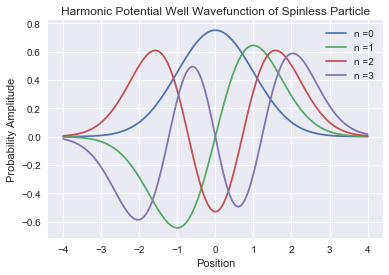

In [5]:
#define the wavefunction for the spinless point particle in a quadratic potential well
from scipy.special import factorial
def wavefunc(n,x):
    L = len(x)
    psi = np.empty(L)
    for l in range(L):
        psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*H(n,x[l])
    return psi

x = np.linspace(-4,4, 100) # a range of points between -4 and 4 for plotting
N = np.arange(0,4) # an array of energy levels from 0 to 3
#for each value of N, plot the wavefunction on the interval [-4,4]
import matplotlib.pyplot as plt

plt.figure
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
for i in range(len(N)):
    n = N[i]
    plt.plot(x, wavefunc(n,x),label = 'n ='+str(n))
    
plt.legend()


## Part a: Plot of $\psi_n (x)$ for $n = 0, 1, 2, 3,...$
Above is the plot of the wavefunction for the spinless particle in the harmonic potential well for $n = 0, 1, 2, 3,...$ on the interval $[-4, 4]$.

## Part b: Plot the wavefunction for n=30
See plot below.

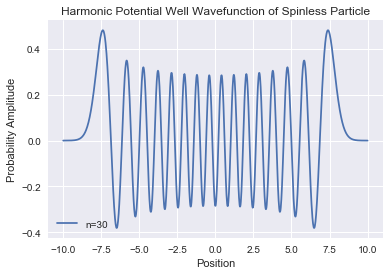

In [6]:
#2b)
x1 = np.linspace(-10,10, 1000) #a range of values between -10 and 10 for plotting wavefunction for n=30
n1 = 30 #energy level

plt.figure
plt.plot(x1, wavefunc(n1, x1), label = 'n=30') 
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
plt.legend()

In [7]:
#2c)
#define a function for the derivative of the wavefunction 
def wavefunc_derivative(n,x):
    L = len(x)
    psi = np.empty(L)
    for l in range(L):
        if n>0:
            psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 2*n*H(n-1,x[l]))
        else:
            psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 0)
    return psi
#define a function for calculating expectation values and uncertainties for position and momentum and calculate total energy
def get_RMSposition_and_RMSmomentum(n):
    '''
    A function to calculate the RMS position and momentum and total energy of a spinless particle in a harmonic potential 
    well for the nth eigenstate of the sytem (requires wavefunc and wavefunc_derivative loaded into memory, respectively 
    being the functions for the wavefunction and its derivate for a given x and n).
    INPUT:
    n : the index of the eigenstate
    OUTPUT:
    RMSx : the root-mean squared position of the particle
    RMSp : the root-mean square momentum of the particle
    Energy : the total energy of the particle
    '''
    from gaussxw import gaussxw

    Num = 100 #100 steps in Gaussian quadrature
    a = -np.pi/2 #lb after coordinate transform
    b = np.pi/2 #ub after coordinate transform

    xG, wG = gaussxw(Num) #get points and weights for Gaussian quadrature

    zG = np.arctan(xG) #coordinate transform from pg. 180 Newman for finite bounds
    
    zp = 0.5*(b-a)*zG/max(zG) + 0.5*(b+a) #scale interval to appropriate bounds
    wp = 0.5*(b-a)*wG #scale weights
    
    def F1(n, x): #integrand after coordinate transform for expectation value for position
        return (np.tan(x)* wavefunc(n, np.array([np.tan(x)]))/np.cos(x))**2
    def F2(n, x): #integrand after coordinate transform for expectation value for momentum
        return (wavefunc_derivative(n, np.array([np.tan(x)]))/np.cos(x))**2

    RMSx = 0.0 #perform weighted summation for Gaussian quadrature to get the root mean position (expectation value)
    for k in range(Num):
        RMSx += wp[k]*F1(n, zp[k])

    RMSp = 0.0
    for k in range(Num): #perform weighted summation for Gaussian quadrature to get the root mean momentum (expectation value)
        RMSp += wp[k]*F2(n, zp[k])

    Energy = (RMSx + RMSp)/2 #calcualte total energy
    #take sqrts of expectation values to get uncertainties
    uncertainty_x = np.sqrt(RMSx)
    uncertainty_p = np.sqrt(RMSp)
    
    return RMSx, RMSp, uncertainty_x, uncertainty_p, Energy

    

In [8]:
RMSx, RMSp, u_x, u_p, Energy = get_RMSposition_and_RMSmomentum(5)
print(u_x)

[2.53567243]


## Part c: Relationship between uncertainty in position and uncertainty in momentum, and Energy and $n$
An interesting relationship is depicted in the plots below of uncertainty in momentum vs. uncertainty in position and total energy vs. energy level $n$. In particular, both of these plots depict linear relationships. This makes sense given that it is known that $E_n = (n+\frac{1}{2})\hbar \omega$, where $\hbar$ and $\omega$ are just constants, and this cleary indicates that energy scales linearly with $n$. Additionally, considering that $E = \frac{1}{2} (\langle x^2 \rangle + \langle p^2 \rangle)$, it is clear that it must be the case that the uncertainty in positon and the uncertainty in momentum must scale linearly with respect to one and other as $n$ increases (or else energy couldnt possibly go linearly with $n$). A simple linear fit reinforces this qualitative observation more strongly by noticing that the fit captures the trend depicted in the data very closely. 

Slope is ~0.9048248577188526
Slope is ~1.2088029879919524


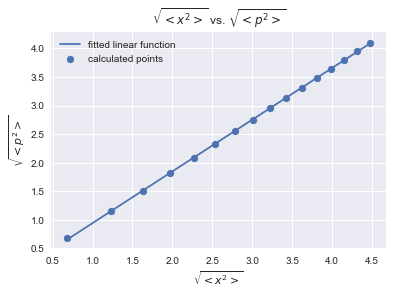

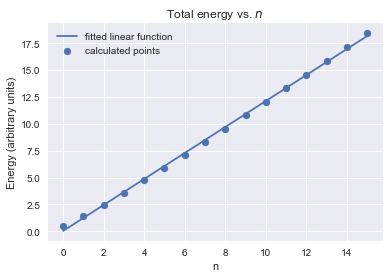

In [13]:
#plot <x^2>, <p^2> for n=0,1,2,...,15
#lets import curvefit tools to back up our claim of linearity
from scipy.optimize import curve_fit

inds = np.arange(0,16) #an array with integers from 0 to 15 for energy levels
#pre-allocate memory for arrays to contain values for uncertainty in position and momentum as well as energy for n = 0,1,2,...15
unc_x = np.empty(len(inds)) 
unc_p = np.empty(len(inds))
Energy = np.empty(len(inds))

for i in inds: #calculate the values
    RMSx, RMSp, u_x, u_p, the_Energy = get_RMSposition_and_RMSmomentum(i)
    unc_x[i] = u_x
    unc_p[i] = u_p
    Energy[i] = the_Energy

def linear(x,a,b):
    return a*x+b
p_opt1, p_cov1 = curve_fit(linear,unc_x, unc_p, bounds = ([0.8, -2],[1.,2.]))
p_opt2, p_cov2 = curve_fit(linear, inds, Energy, bounds =([0.8, -2],[2.,2.]))

#plot expectation value for position agaisnt expectation value for momentum
plt.figure()
plt.scatter(unc_x, unc_p, label = 'calculated points')
plt.plot(unc_x,linear(unc_x,*p_opt1), label = 'fitted linear function')
plt.title('$\sqrt{<x^2>}$ vs. $\sqrt{<p^2>}$')
plt.xlabel('$\sqrt{<x^2>}$')
plt.ylabel('$\sqrt{<p^2>}$')
plt.legend()
print('Slope is ~{0}'.format(p_opt1[0]))
#plot total energy vs energy level
plt.figure()
plt.scatter(inds, Energy, label = 'calculated points')
plt.plot(inds,linear(inds,*p_opt2), label = 'fitted linear function')
plt.title('Total energy vs. $n$')
plt.xlabel('n')
plt.ylabel('Energy (arbitrary units)')
plt.legend()
print('Slope is ~{0}'.format(p_opt2[0]))